In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import scipy
import seaborn as sns
sns.set_theme(style="whitegrid")


# draw subgraph(a)

## loaddata

In [2]:
aps_data = pd.read_csv('../data/fig2/aps_overall.csv')  
#58:A_Behavior_model_vfinal/analysis/intuition.ipynb

In [3]:
label='EP'
print( f"Correlaiton between {label} and logc5 in aps is {round( float( aps_data.corr()[label] ['logCit'] )  ,5)}" )

Correlaiton between EP and logc5 in aps is -0.10722


## draw 

In [4]:
aps_data['cut'] = (pd.cut(aps_data[label],bins=10,right=True))

data1 = (aps_data.groupby(['cut']).agg({'aid':'count','logCit':'std'}).reset_index())
data1_95 = list(1.96* data1['logCit'] / (data1['aid'].apply(np.sqrt)))
data1 = (aps_data.groupby(['cut']).agg({'logCit':'mean'}).reset_index())
data1_performance = list(data1['logCit'])

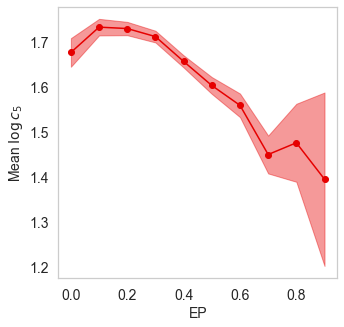

In [5]:
x_labels = np.arange(0,1,.1)
n_step=.1
colors = [(0.9019607843137255, 0.0, 0.0, 1.0)]

fig, ax1 = plt.subplots(figsize = (5, 5))
ax1.plot(x_labels ,data1_performance, '-o',color=colors[0])
ax1.fill_between(  x_labels, data1_performance - np.array(data1_95)     , data1_performance+ np.array(data1_95) ,alpha=0.4,color= colors[0])

fontsize=14
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
ax1.set_ylabel('Mean $\log c_5$',fontdict=font_conf)
ax1.set_xlabel(label,fontdict=font_conf)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize =fontsize)
plt.yticks(fontsize =fontsize)
ax1.grid(False)
plt.savefig('./draw/figure_2a.png', format="png", bbox_inches="tight")
plt.show()

# draw subgraph(b)

In [6]:
aps_data = pd.read_csv('../data/fig2/aps_attempts.csv')  
#58:A_Behavior_model_vfinal/analysis/preformance.ipynb

In [7]:
left=aps_data['pastmeanlogcitation'].quantile(0)
right=aps_data['pastmeanlogcitation'].quantile(0.995) #0.995
step=(right-left)/(20-1)
x_labels = np.arange(left,right,step)
aps_data['cut'] = (pd.cut(aps_data['pastmeanlogcitation'],bins=list(np.arange(left,right,step)),right=False))

data1 = (aps_data.groupby(['cut']).agg({'aid':'count','EP':'std'}).reset_index())
data1_95 = list(1.96* data1['EP'] / (data1['aid'].apply(np.sqrt)))
data1_count = list(data1['aid'])
data1 = (aps_data.groupby(['cut']).agg({'EP':'mean'}).reset_index())
data1_performance = list(data1['EP'])

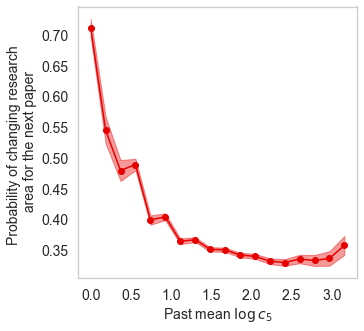

In [8]:
colors = [(0.9019607843137255, 0.0, 0.0, 1.0)]
fig, ax1 = plt.subplots(figsize = (5, 5))
ax1.plot(x_labels[:-1] ,data1_performance, '-o',color=colors[0])
ax1.fill_between(  x_labels[:-1], data1_performance - np.array(data1_95)     , data1_performance+ np.array(data1_95) ,alpha=0.4,color= colors[0])
fontsize=14
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
ax1.set_ylabel('Probability of changing research \n area for the next paper',fontdict=font_conf)
ax1.set_xlabel('Past mean $\log c_5$',fontdict=font_conf)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize =fontsize)
ax1.grid(False)
plt.savefig('./draw/figure_2b.png', format="png", bbox_inches="tight")
plt.show()